# K-Means Clustering

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

## Create Dataframe and Explore Data

In [2]:
collection = pd.read_csv("../Files/spotify_songs.csv")

In [3]:
collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86766 entries, 0 to 86765
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                86766 non-null  object 
 1   song              86766 non-null  object 
 2   artist            86766 non-null  object 
 3   danceability      86766 non-null  float64
 4   energy            86766 non-null  float64
 5   key               86766 non-null  int64  
 6   loudness          86766 non-null  float64
 7   mode              86766 non-null  int64  
 8   speechiness       86766 non-null  float64
 9   acousticness      86766 non-null  float64
 10  instrumentalness  86766 non-null  float64
 11  liveness          86766 non-null  float64
 12  valence           86766 non-null  float64
 13  tempo             86766 non-null  float64
 14  type              86766 non-null  object 
 15  uri               86766 non-null  object 
 16  track_href        86766 non-null  object

In [4]:
# Return number of unique artists
collection["artist"].nunique()

1269

In [5]:
# Drop irrelevant columns
collection = collection.drop(["id", "song", "artist", "type", "uri",
            "track_href", "analysis_url", "duration_ms", "time_signature"], axis=1)
collection.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.249,0.452,2,-7.126,1,0.0303,0.550,0.4270,0.0614,0.0676,142.352
1,0.336,0.761,3,-6.259,1,0.0353,0.037,0.0155,0.1630,0.4230,96.008
2,0.507,0.790,0,-7.307,0,0.0294,0.233,0.1390,0.1450,0.6000,147.065
3,0.376,0.560,11,-6.631,1,0.0253,0.568,0.1930,0.1560,0.1790,160.329
4,0.572,0.424,5,-9.225,1,0.0268,0.729,0.0914,0.0930,0.4770,96.065


In [6]:
# Convert all remaining columns to float
X = collection.astype({"key": "float", "mode": "float"})
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86766 entries, 0 to 86765
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      86766 non-null  float64
 1   energy            86766 non-null  float64
 2   key               86766 non-null  float64
 3   loudness          86766 non-null  float64
 4   mode              86766 non-null  float64
 5   speechiness       86766 non-null  float64
 6   acousticness      86766 non-null  float64
 7   instrumentalness  86766 non-null  float64
 8   liveness          86766 non-null  float64
 9   valence           86766 non-null  float64
 10  tempo             86766 non-null  float64
dtypes: float64(11)
memory usage: 7.3 MB


In [7]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,86766.000000,86766.000000,86766.00000,86766.000000,86766.000000,86766.000000,86766.000000,86766.000000,86766.000000,86766.000000,86766.000000
mean,0.526873,0.675389,5.26598,-7.708622,0.662206,0.077546,0.223599,0.166153,0.232763,0.454952,124.403009
std,0.170925,0.231334,3.61709,4.059341,0.472961,0.107409,0.299727,0.290500,0.213890,0.241974,28.678408
min,0.000000,0.000000,0.00000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407000,0.521000,2.00000,-9.340000,0.000000,0.034000,0.005070,0.000013,0.099500,0.261000,104.064000
50%,0.533000,0.724000,5.00000,-6.820000,1.000000,0.044600,0.058300,0.002700,0.137000,0.440000,124.004000
75%,0.649000,0.868000,9.00000,-5.037000,1.000000,0.071400,0.362000,0.178000,0.300000,0.639000,141.041000
max,0.991000,1.000000,11.00000,4.472000,1.000000,0.965000,0.996000,0.998000,1.000000,0.999000,242.708000


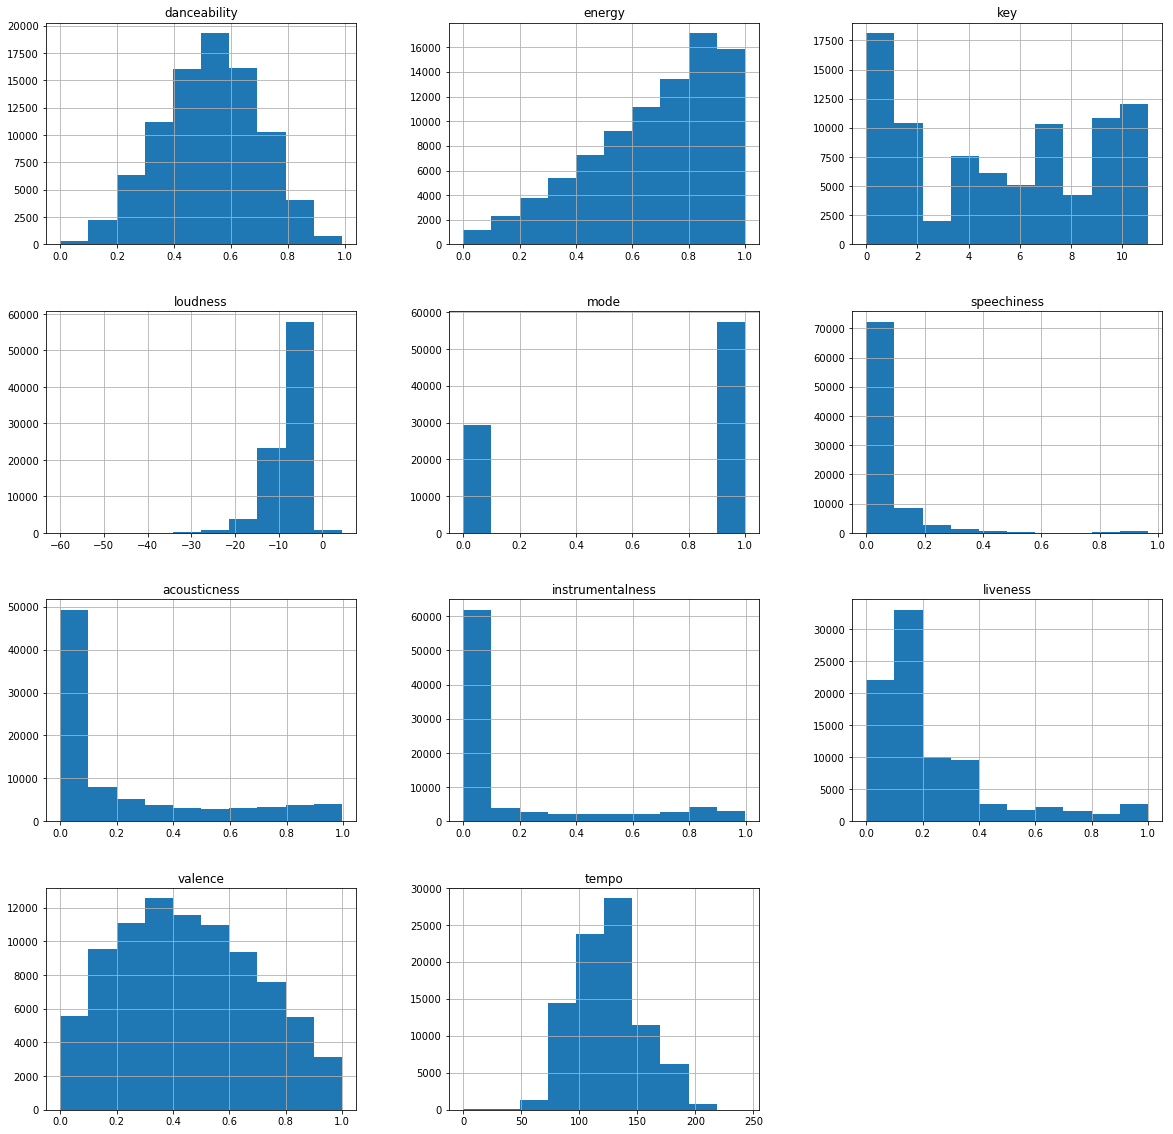

In [8]:
X.hist(figsize=(20,20));

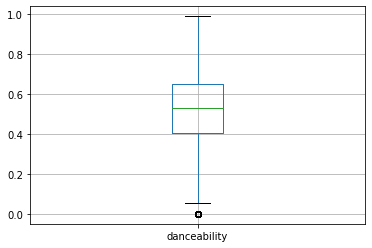

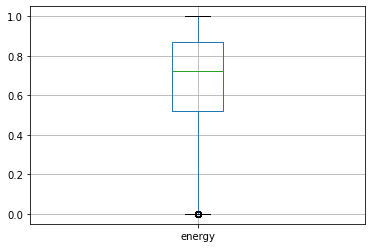

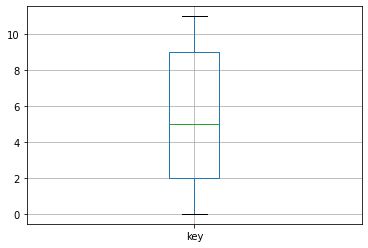

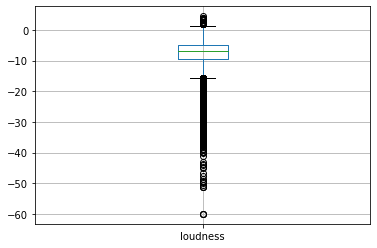

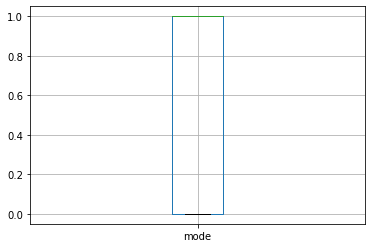

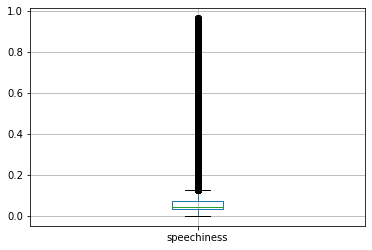

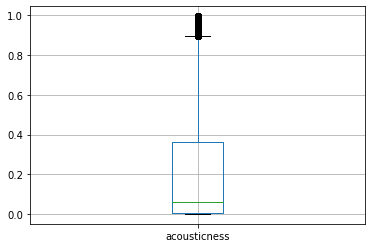

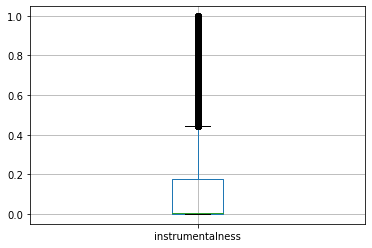

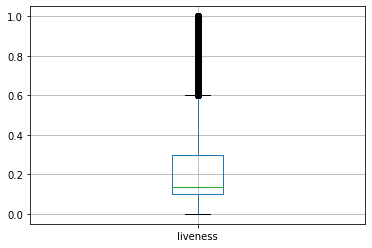

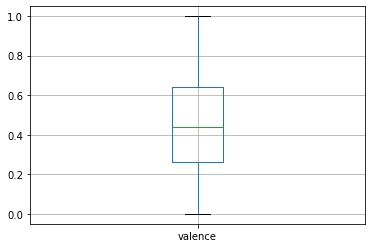

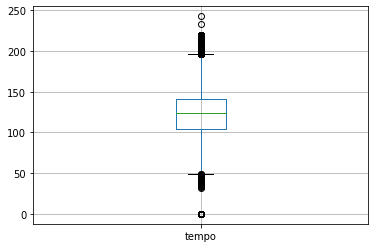

In [9]:
for column in X:
    plt.figure()
    X.boxplot([column])

## Prepare the Data

In [10]:
# Scale data with the standard scaler
X_scaled = StandardScaler().fit_transform(X)

In [11]:
# Create dataframe of scaled features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.625714,-0.965660,-0.902936,0.143527,0.714215,-0.439870,1.089002,0.897930,-0.801179,-1.600810,0.625875
1,-1.116715,0.370077,-0.626469,0.357110,0.714215,-0.393319,-0.622567,-0.518603,-0.326165,-0.132048,-0.990124
2,-0.116268,0.495437,-1.455869,0.098938,-1.400138,-0.448249,0.031366,-0.093471,-0.410321,0.599440,0.790215
3,-0.882692,-0.498800,1.585267,0.265469,0.714215,-0.486422,1.149058,0.092417,-0.358892,-1.140427,1.252726
4,0.264019,-1.086698,-0.073535,-0.373555,0.714215,-0.472456,1.686217,-0.257328,-0.653438,0.091118,-0.988136


## Clustering

In [12]:
# Define and fit the model
kmeans = KMeans(n_clusters=8, random_state=40)
kmeans.fit(X_scaled)

# Predict / assign the clusters:
clusters = kmeans.predict(X_scaled)

X_cluster = pd.DataFrame(X)
X_cluster["cluster"] = clusters

In [13]:
# Cluster centers
kmeans.cluster_centers_

array([[ 0.19533043,  0.16330601,  0.05192926, -0.08722493, -0.07725413,
        -0.18922287, -0.29190284,  2.04519564, -0.26793784, -0.05703539,
         0.04416617],
       [ 0.43960131,  0.32990748,  0.35906805,  0.37124009, -1.40013842,
        -0.00694944, -0.38453755, -0.39698657, -0.2285345 ,  0.38784764,
        -0.06328489],
       [-0.15052145, -1.34752809, -0.11702616, -0.81324753,  0.18129666,
        -0.27500018,  1.389713  , -0.38653834, -0.29083245, -0.70841926,
        -0.41233918],
       [-0.82992832,  0.62749538, -0.10183996,  0.57203639,  0.47887064,
        -0.0363191 , -0.57167937, -0.3711987 , -0.16541483, -0.26903096,
         0.92685986],
       [ 0.70218201, -1.54649768,  0.18665591, -2.6846324 ,  0.0260277 ,
         6.58283457,  1.59977283, -0.49416371,  0.55555408,  0.44813178,
        -0.71426736],
       [-0.83030982, -1.69451542, -0.0784542 , -2.12752441, -0.05680855,
        -0.27975631,  1.86158723,  2.01362711, -0.25958399, -1.10777037,
        -0.523

In [14]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     9536
1    16780
2    13176
3    15200
4     1189
5     3989
6    19925
7     6971
dtype: int64

In [15]:
# Explore the cluster assignment by placing it in the original dataset
X_cluster = pd.DataFrame(X)
X_cluster["cluster"] = clusters
X_cluster.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.249,0.452,2.0,-7.126,1.0,0.0303,0.5500,0.4270,0.0614,0.0676,142.352,2
1,0.336,0.761,3.0,-6.259,1.0,0.0353,0.0370,0.0155,0.1630,0.4230,96.008,3
2,0.507,0.790,0.0,-7.307,0.0,0.0294,0.2330,0.1390,0.1450,0.6000,147.065,1
3,0.376,0.560,11.0,-6.631,1.0,0.0253,0.5680,0.1930,0.1560,0.1790,160.329,3
4,0.572,0.424,5.0,-9.225,1.0,0.0268,0.7290,0.0914,0.0930,0.4770,96.065,2
5,0.489,0.467,1.0,-7.686,1.0,0.0284,0.3650,0.8720,0.0572,0.1460,104.887,0
6,0.440,0.510,3.0,-7.820,1.0,0.0275,0.5390,0.5760,0.0903,0.2200,81.097,2
7,0.495,0.569,0.0,-10.461,1.0,0.0289,0.6660,0.5050,0.1200,0.4220,168.034,2
8,0.179,0.483,3.0,-7.107,1.0,0.0327,0.7040,0.9430,0.1540,0.0593,121.117,5
9,0.528,0.797,9.0,-5.387,1.0,0.0440,0.0792,0.0000,0.3270,0.8770,160.848,6


In [16]:
# Total inertia of all the centroids
kmeans.inertia_

507689.18681367004

In [17]:
# Run K-means with all values of K, ranging from 2 to 30
K = range(2, 30)

In [18]:
# For each model, store the inertia in a list
inertia = []
for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

  0%|          | 0/28 [00:00<?, ?it/s]

[788036.4973548535, 716096.0572595489, 656926.7739418562, 605159.5925235363, 566060.2320668709, 531613.1569352685, 507689.18681367004, 488414.962701974, 473121.4831794744, 460631.2750249955, 447010.123463026, 437281.2429059601, 426655.3005744198, 417995.3605898911, 411717.8534448528, 406792.2529843583, 396675.65667194483, 390369.67612082994, 384549.53892646736, 377755.1266163625, 372903.5663323798, 368488.7917076235, 362541.71069087245, 356830.48720442806, 353503.2682252951, 350258.26451729186, 346051.07222728094, 343626.18380603625]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

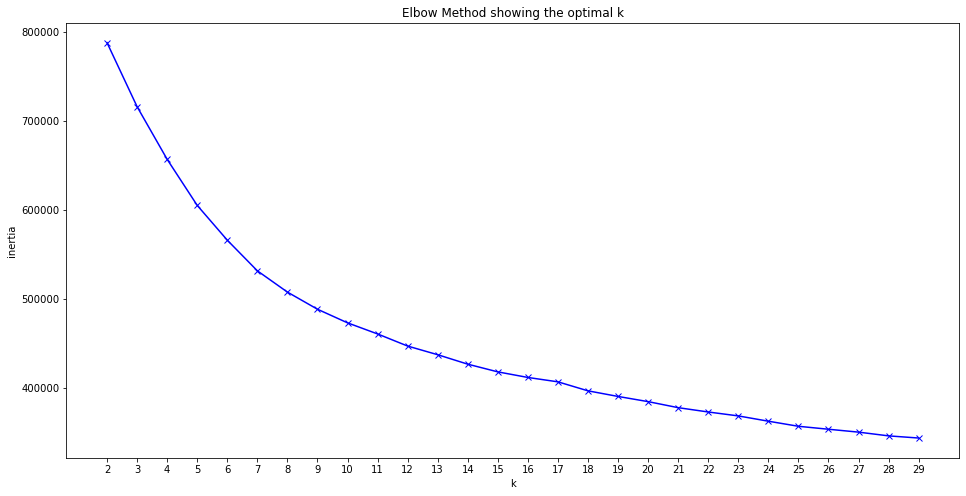

In [19]:
# Plot the results
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks(np.arange(min(K), max(K) + 1, 1.0))
plt.title("Elbow Method showing the optimal k")

In [20]:
# For each model, store the silhouette score in a list
silhouettes = []
for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_scaled)
    silhouettes.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))

print(silhouettes)

  0%|          | 0/28 [00:00<?, ?it/s]

[0.23011882763089192, 0.14312572632418732, 0.13716405714656812, 0.16201980880832206, 0.1414740887467361, 0.14395218002206941, 0.1455745305390644, 0.13431822368528093, 0.12736567061554305, 0.12835921073016468, 0.12930219994534828, 0.13098826808100425, 0.12972553284329574, 0.12711039497545812, 0.12184823925126503, 0.12330033916842259, 0.12389306744742958, 0.12367985731902699, 0.12323869544854975, 0.12526013229641964, 0.12170892828166993, 0.11930243541806902, 0.12341430721185809, 0.12407683545553734, 0.12392374538332505, 0.12098967633686403, 0.1199760658839193, 0.11719357975411979]


Text(0, 0.5, 'silhouette score')

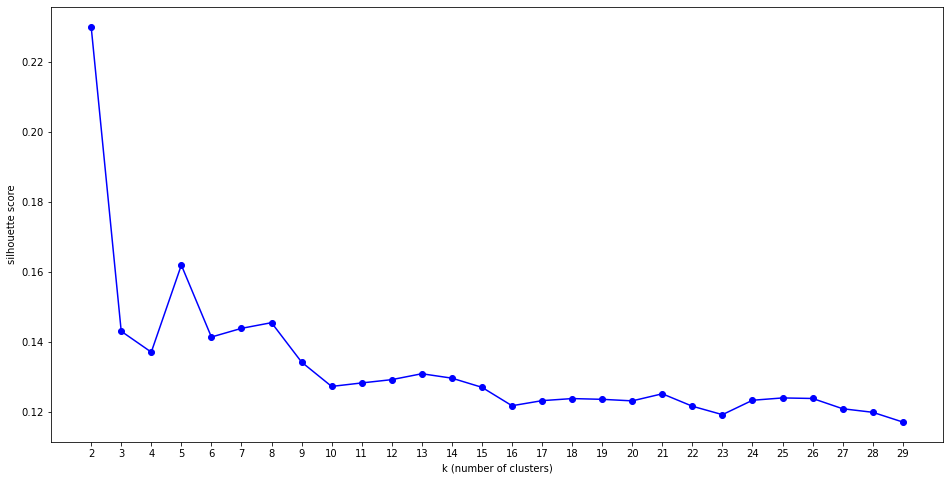

In [21]:
# Plot the results
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, "bo-")
plt.xlabel("k (number of clusters)")
plt.xticks(np.arange(min(K), max(K) + 1, 1.0))
plt.ylabel("silhouette score")